# Problem Statement

    Perform Clustering (Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

    Data Description:
    Murder -- Muder rates in different places of United States
    Assualt- Assualt rate in different places of United States
    UrbanPop - urban population in different places of United States
    Rape - Rape rate in different places of United States


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [59]:
df= pd.read_csv('crime_data.csv')
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [60]:
df= df.drop(columns='Unnamed: 0')
df.head(5)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [9]:
#Data description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
df.duplicated().sum()

0

In [12]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

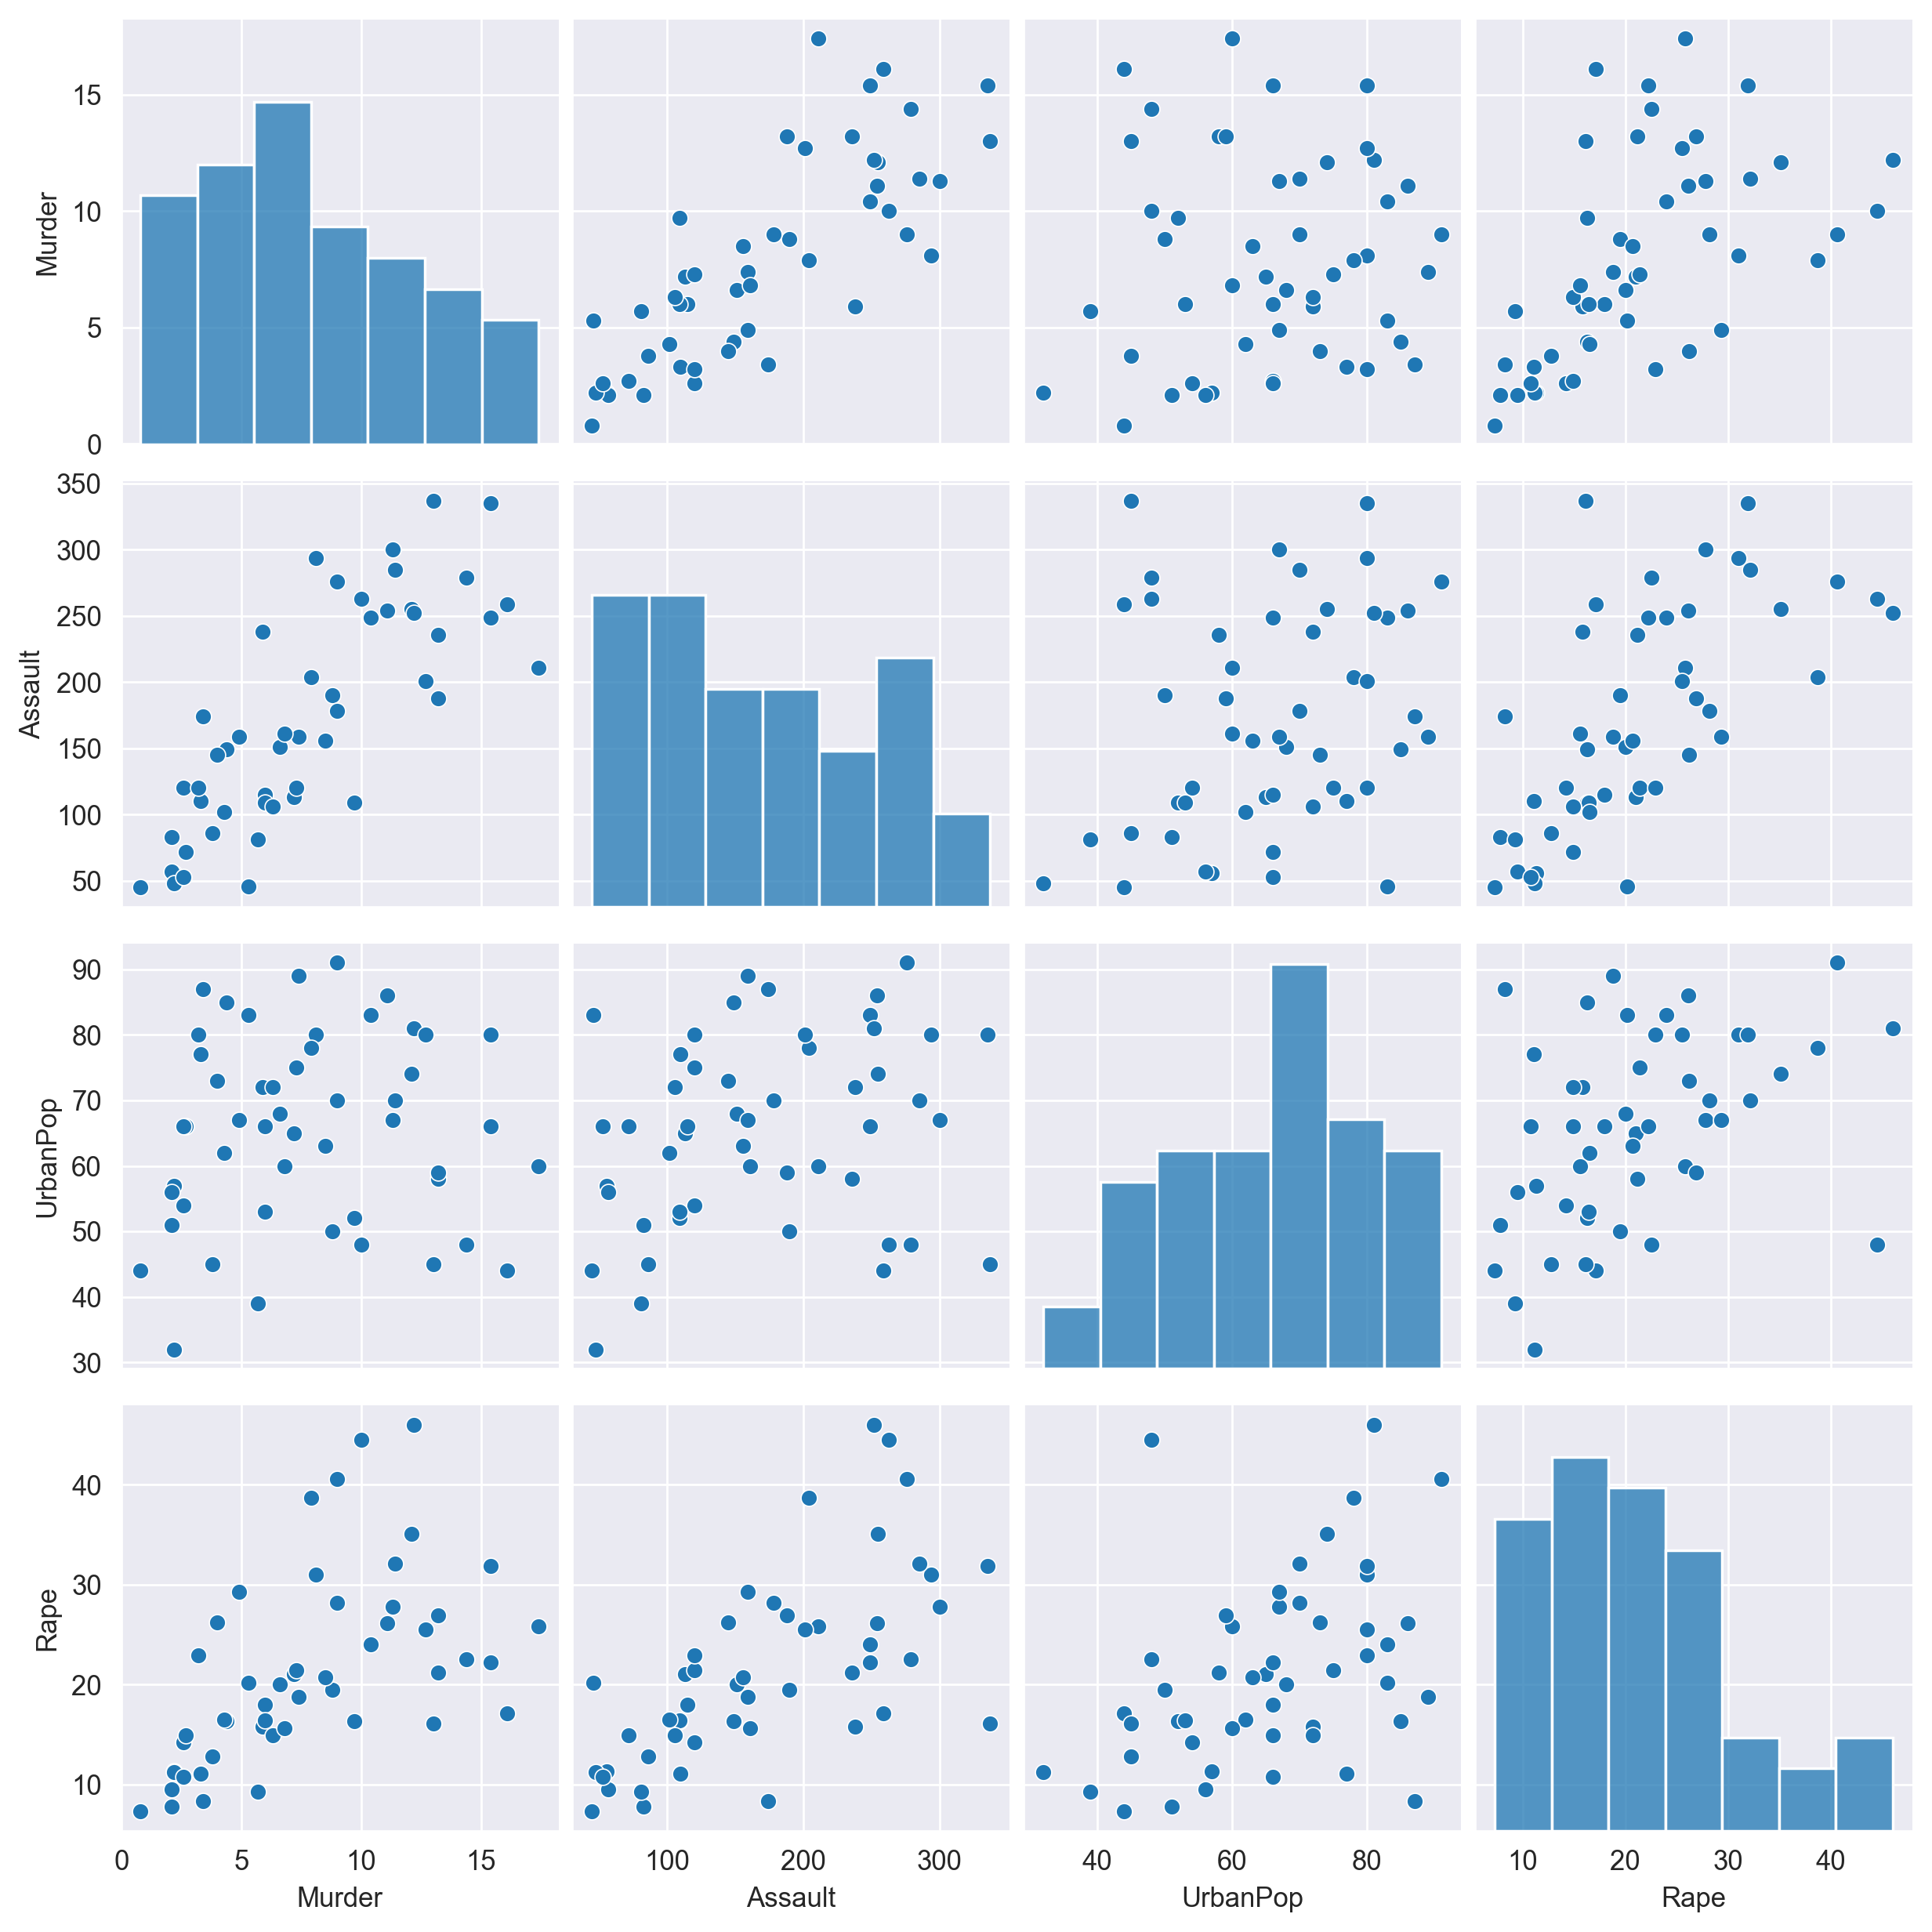

In [13]:
sns.pairplot(df)

# Feature Scaling

In [22]:
from sklearn.preprocessing import normalize

In [23]:
df_norm=pd.DataFrame(normalize(df),columns=df.columns)

In [24]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [25]:
from scipy.cluster import hierarchy

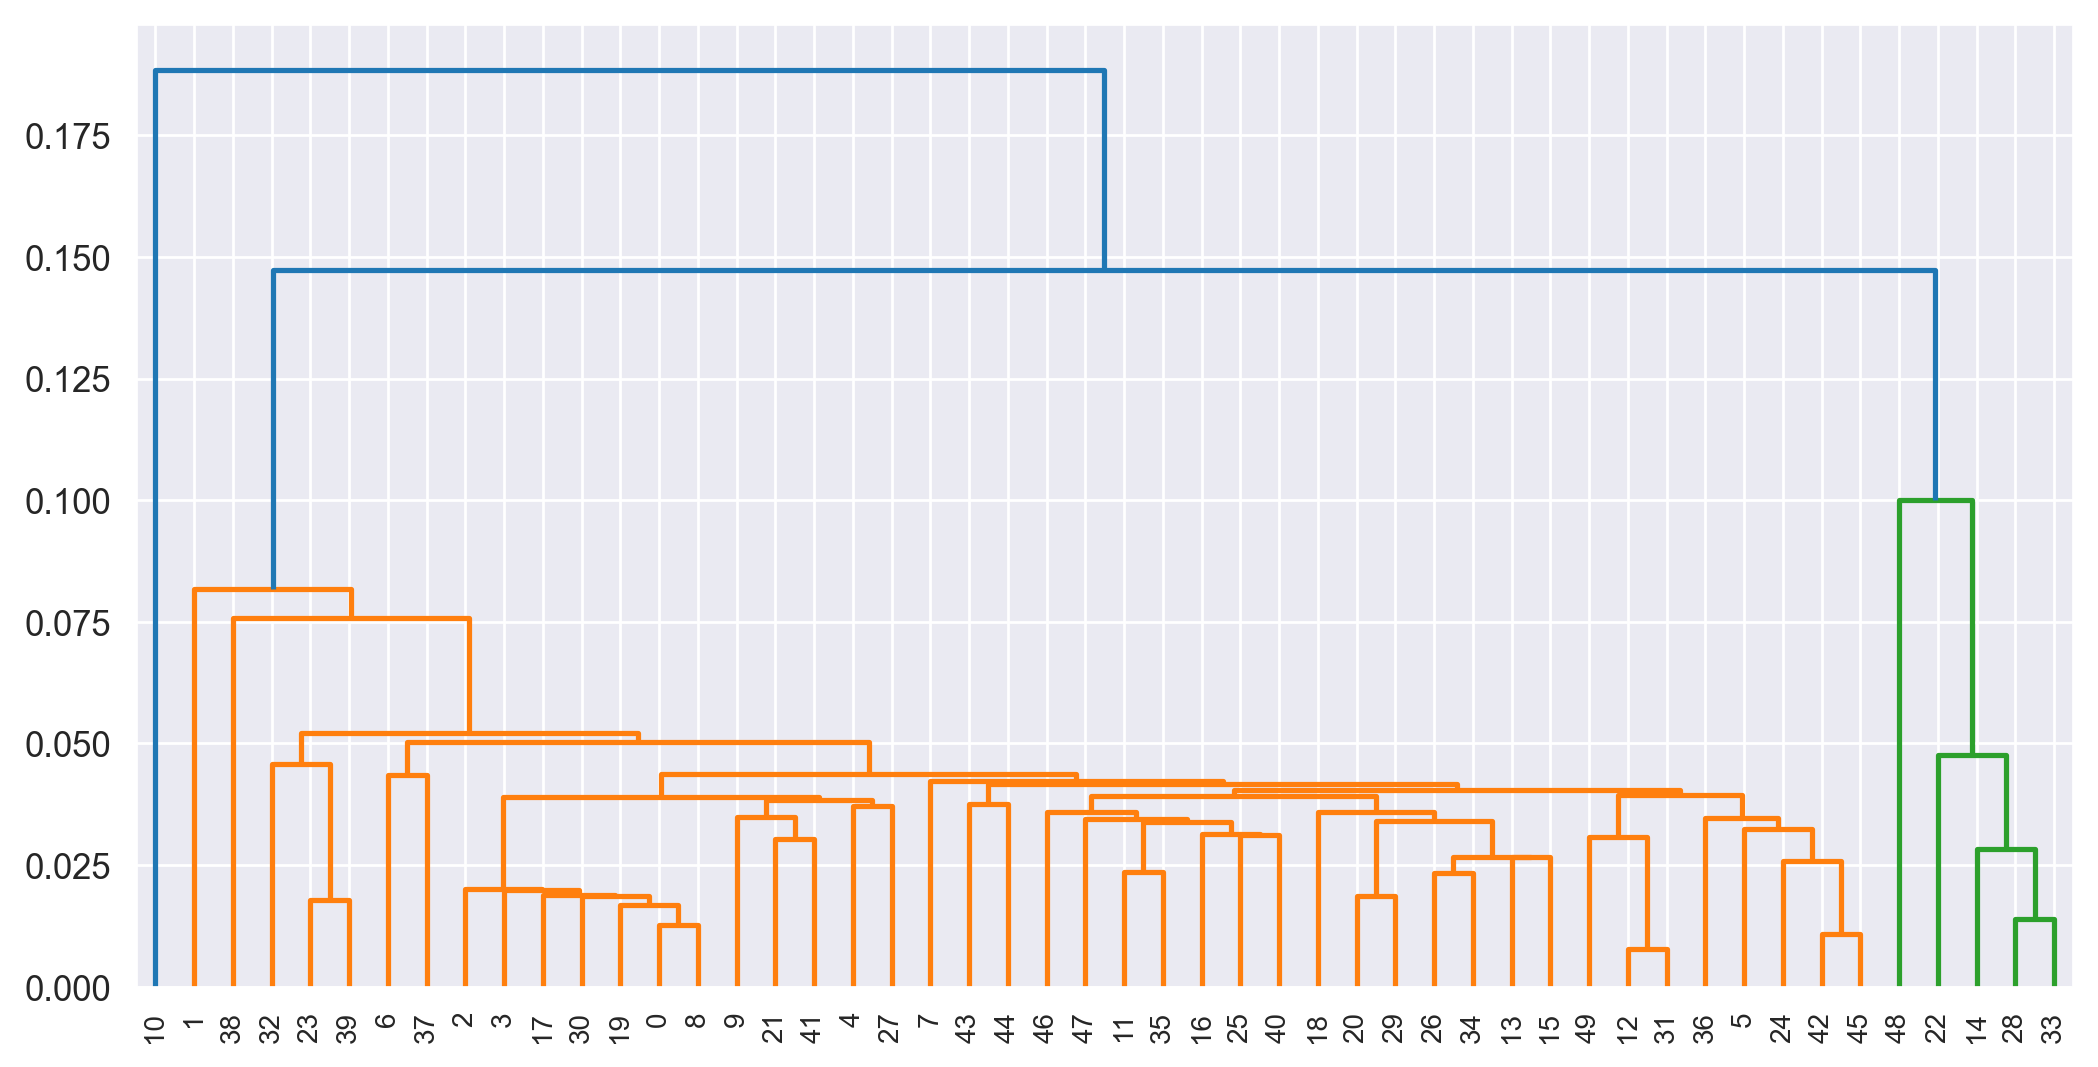

In [27]:
lk= hierarchy.linkage(df_norm, method='single')
dendo= hierarchy.dendrogram(lk)

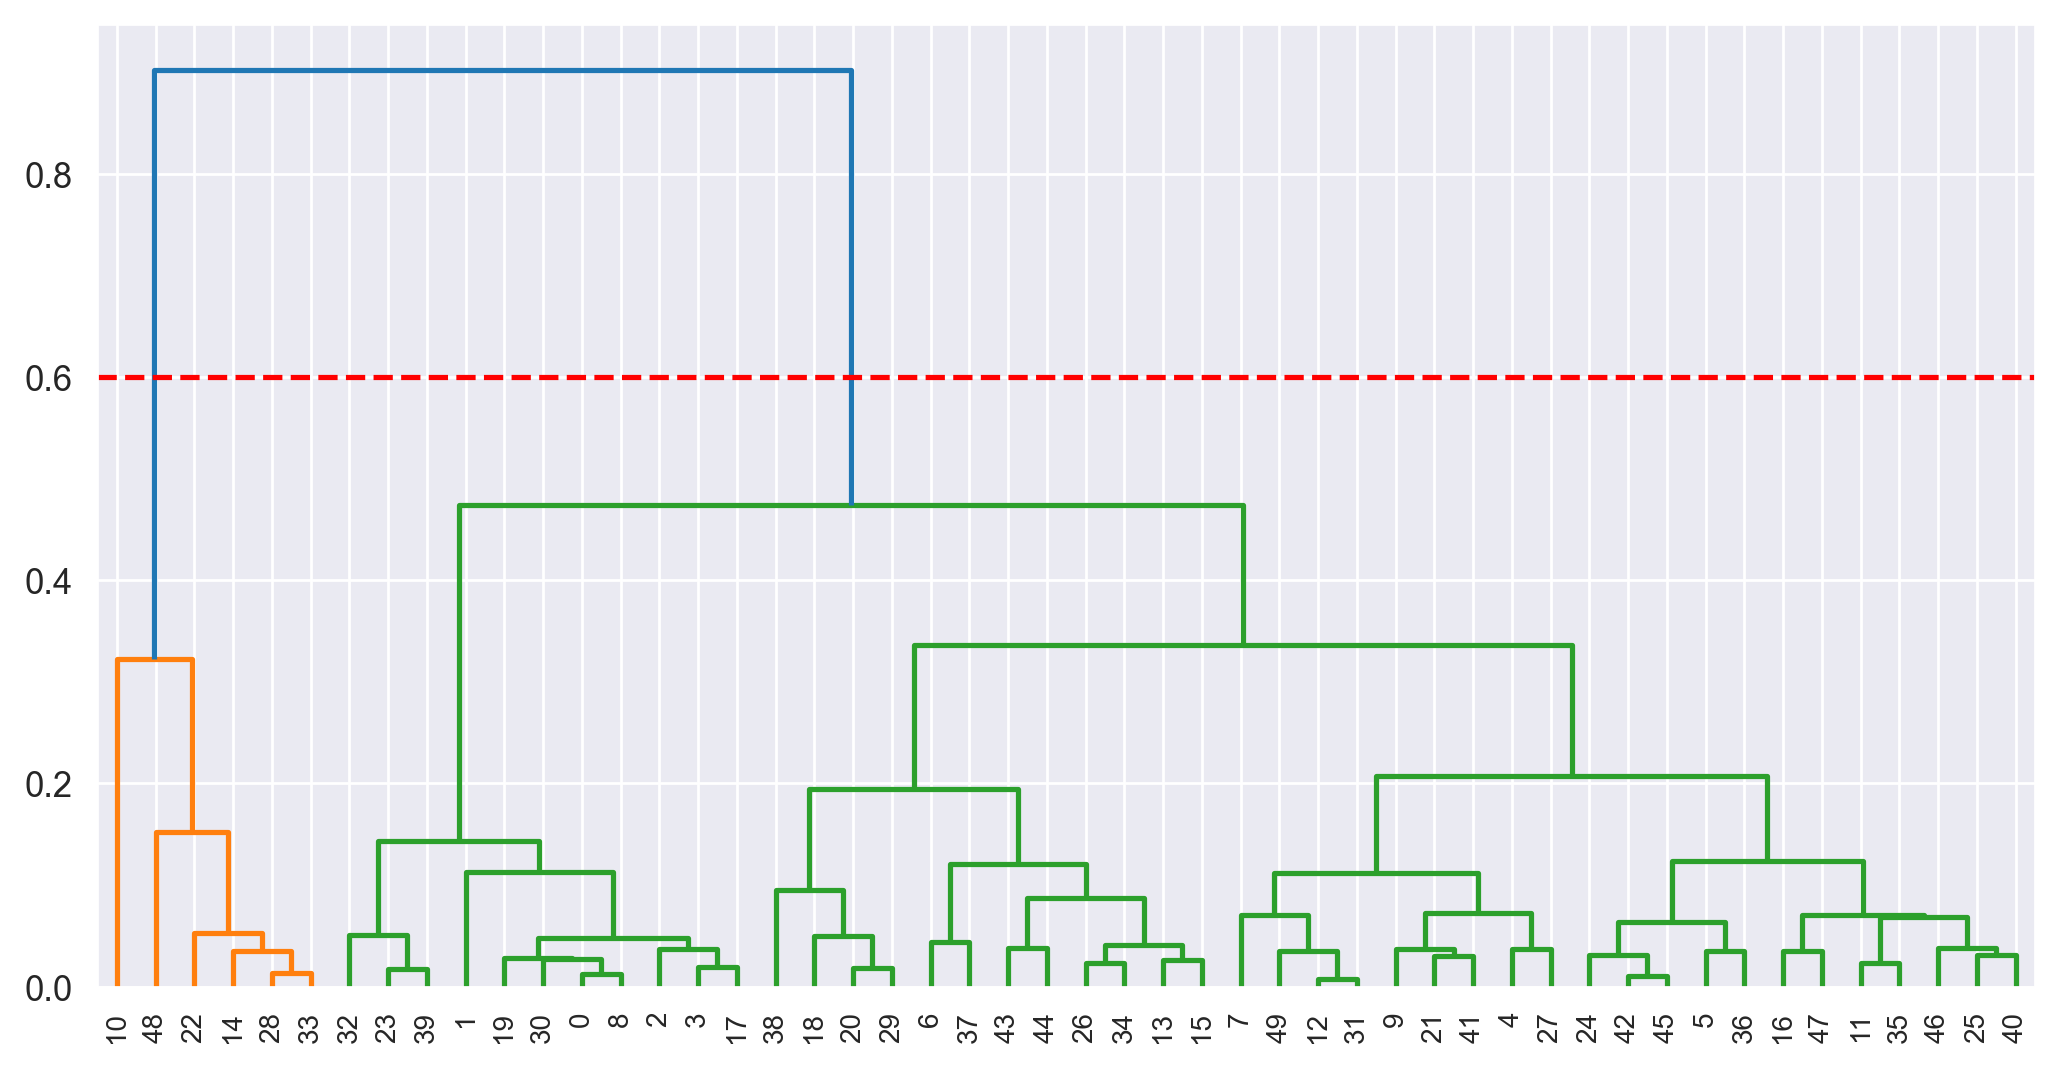

In [30]:
lk= hierarchy.linkage(df_norm, method='complete')
dendo= hierarchy.dendrogram(lk)
plt.axhline(y=0.6, c='red', linestyle='--' )

# Model Building

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
hc= AgglomerativeClustering(n_clusters=4)

y=hc.fit_predict(df_norm)

In [52]:
y 

array([2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 0, 3, 2, 1, 0, 1, 3, 2, 1, 2, 1, 2,
       0, 2, 3, 3, 1, 2, 0, 1, 2, 2, 2, 0, 1, 3, 3, 1, 1, 2, 3, 2, 3, 1,
       1, 3, 3, 3, 0, 2], dtype=int64)

In [53]:
df['Cluster']=y
df 

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,2


In [54]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,2.616667,54.833333,62.000000,12.333333
1,4.758333,116.583333,70.083333,15.683333
2,11.760000,255.550000,66.100000,27.090000
3,6.783333,141.583333,61.833333,21.466667


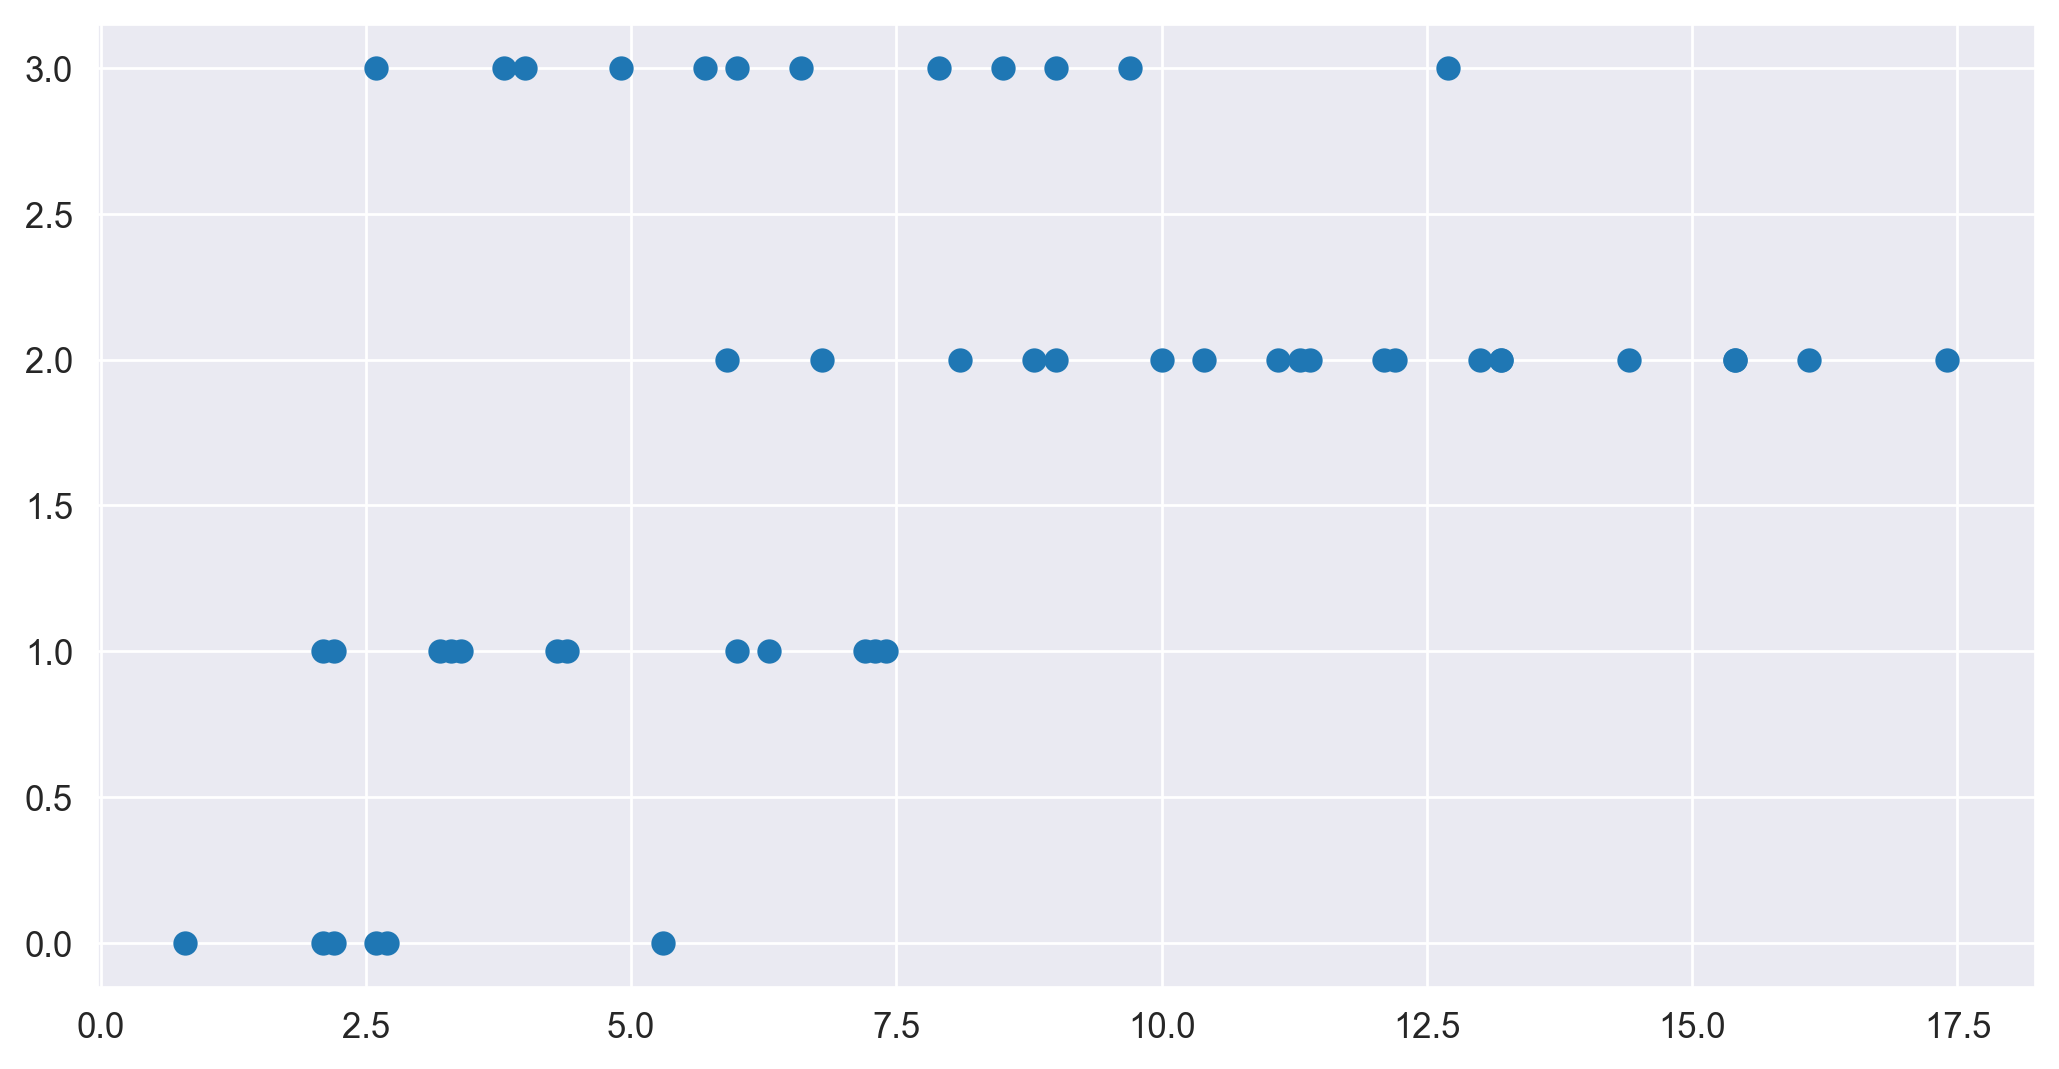

In [55]:
plt.scatter(df['Murder'],df['Cluster'])

# K-means

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()

x= sc.fit_transform(df)
x 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [63]:
df_sc=pd.DataFrame(x ,columns=df.columns)
df_sc.head(5)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [64]:
km= KMeans()
y= km.fit_predict(x)
y 

array([0, 3, 5, 6, 3, 3, 2, 2, 5, 0, 4, 1, 5, 4, 1, 4, 6, 0, 7, 5, 2, 3,
       1, 0, 4, 6, 1, 3, 1, 2, 5, 5, 0, 7, 4, 4, 4, 4, 2, 0, 7, 0, 5, 4,
       7, 6, 4, 7, 1, 6])

In [66]:
df1 = pd.DataFrame(x, columns=df.columns)
df1['cluster'] = y
df1.head(5)

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,3
2,0.072361,1.493817,1.009122,1.053466,5
3,0.234708,0.233212,-1.084492,-0.186794,6
4,0.281093,1.275635,1.776781,2.088814,3


In [67]:
km.cluster_centers_

array([[ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-1.16843924, -1.14052421, -0.37498964, -0.90219046],
       [-0.67443853, -0.05769692,  1.14869656, -0.77349099],
       [ 0.56868063,  0.96048397,  0.61831419,  2.12979644],
       [-0.41932079, -0.5510298 ,  0.4438463 ,  0.10547604],
       [ 0.85759319,  1.2513928 ,  0.86954794,  0.76689681],
       [ 0.03989114, -0.31224214, -0.69368431, -0.38092166],
       [-1.12901195, -1.2383019 , -1.62883218, -1.24586837]])

# Elbow Graph

In [72]:
wcss=[]

for i in range (1,21):
    km= KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [73]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 49.96920284452793,
 43.90176553121852,
 39.46743710656854,
 35.80326258512439,
 32.15816796666758,
 28.306767079529312,
 24.606203180789237,
 23.858551710350827,
 21.0943291274343,
 19.805506529441953,
 17.482745260389297,
 17.060858112921256,
 15.676357063473109,
 14.95012432033391,
 13.421775601013872,
 13.00322940135704]

Text(0.5, 1.0, 'Elbow Curve')

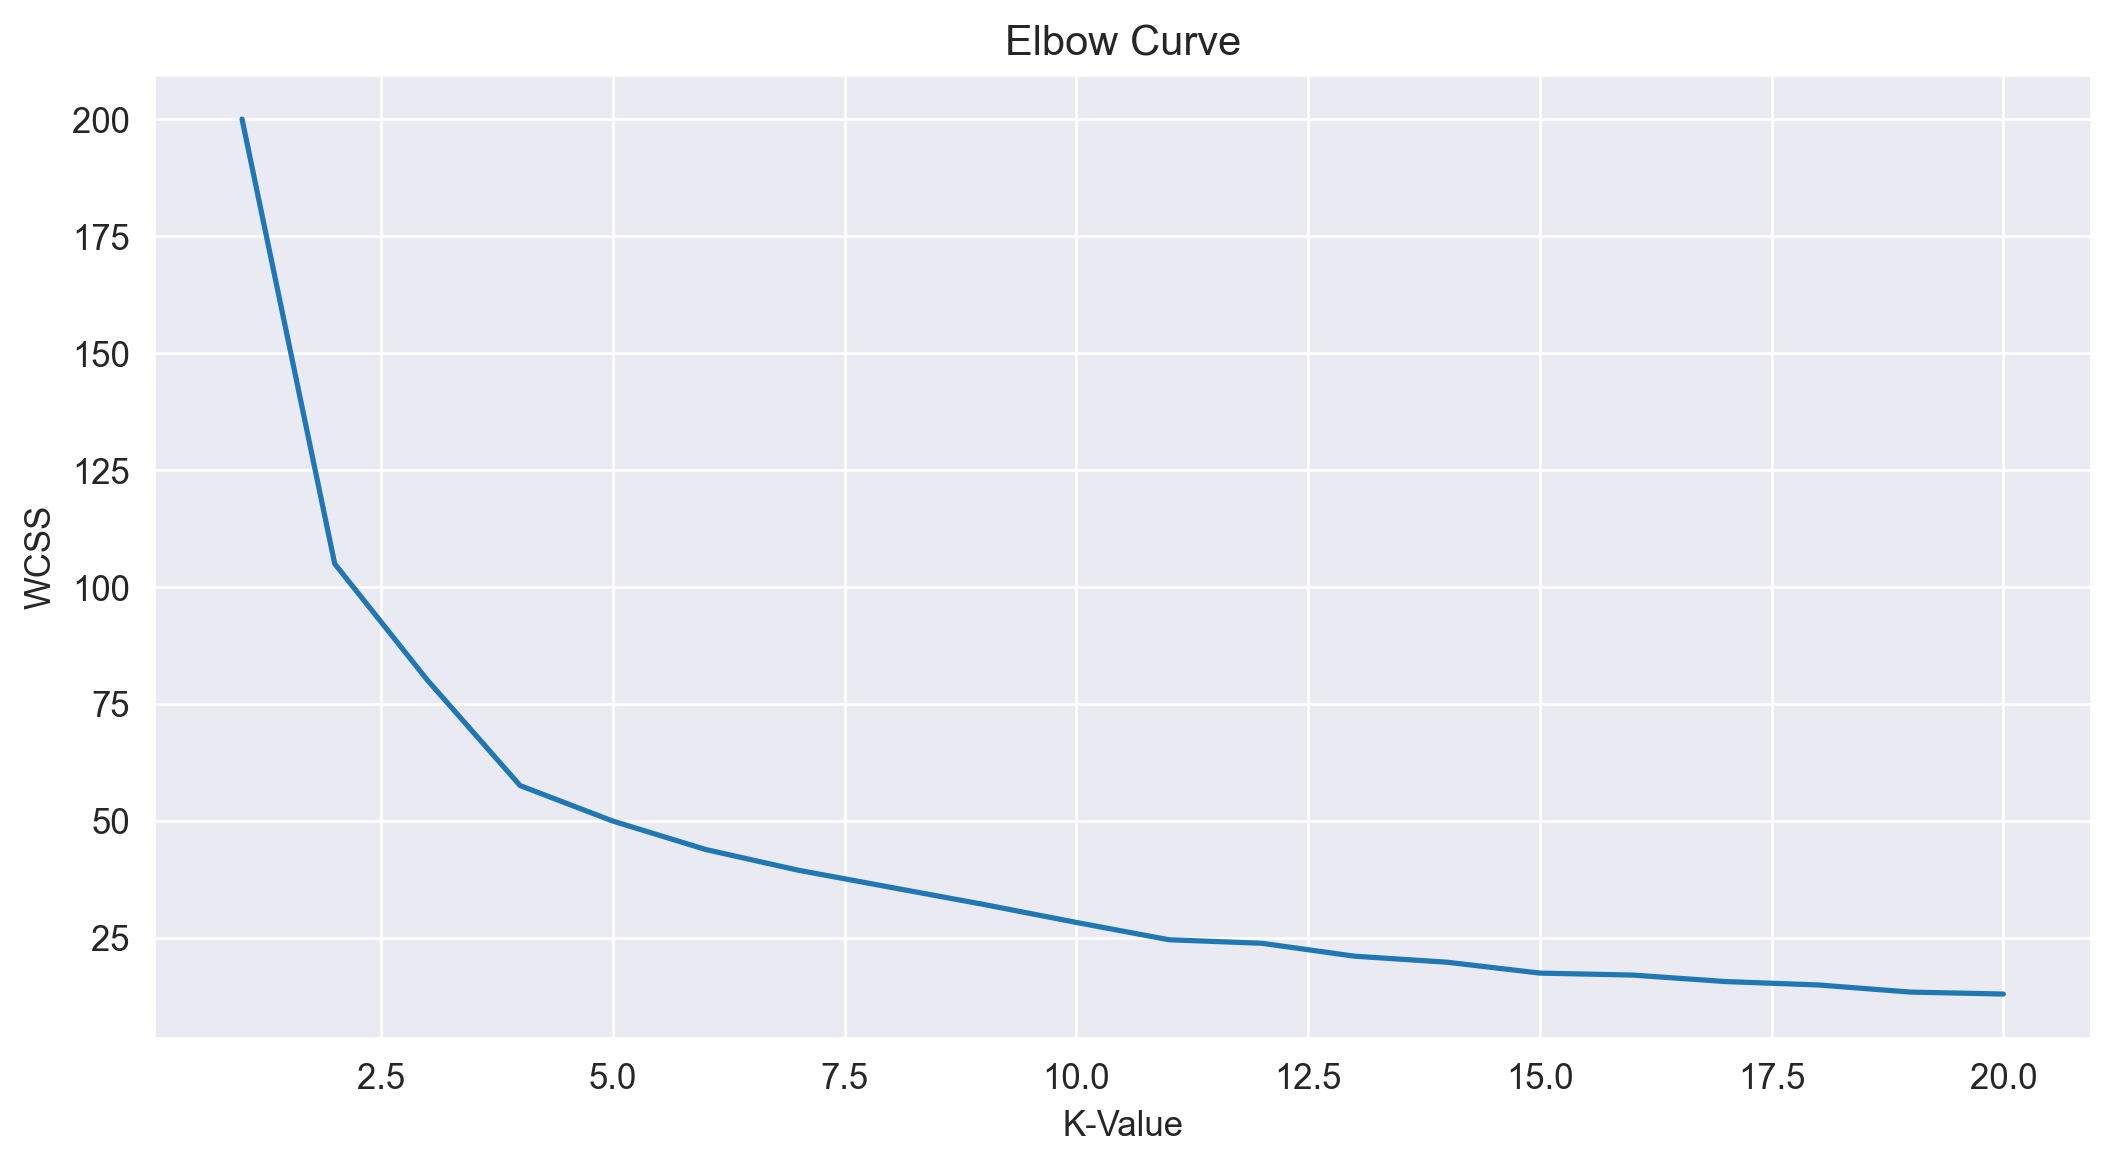

In [74]:
plt.plot(range(1,21), wcss)
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

# Final Model

In [79]:
km= KMeans(n_clusters=4)
y=km.fit_predict(x)
y 

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [80]:
df['Cluster']=y
df.head(6)

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1


In [81]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.815385,257.384615,76.000000,33.192308
2,13.937500,243.625000,53.750000,21.412500
3,5.656250,138.875000,73.875000,18.781250


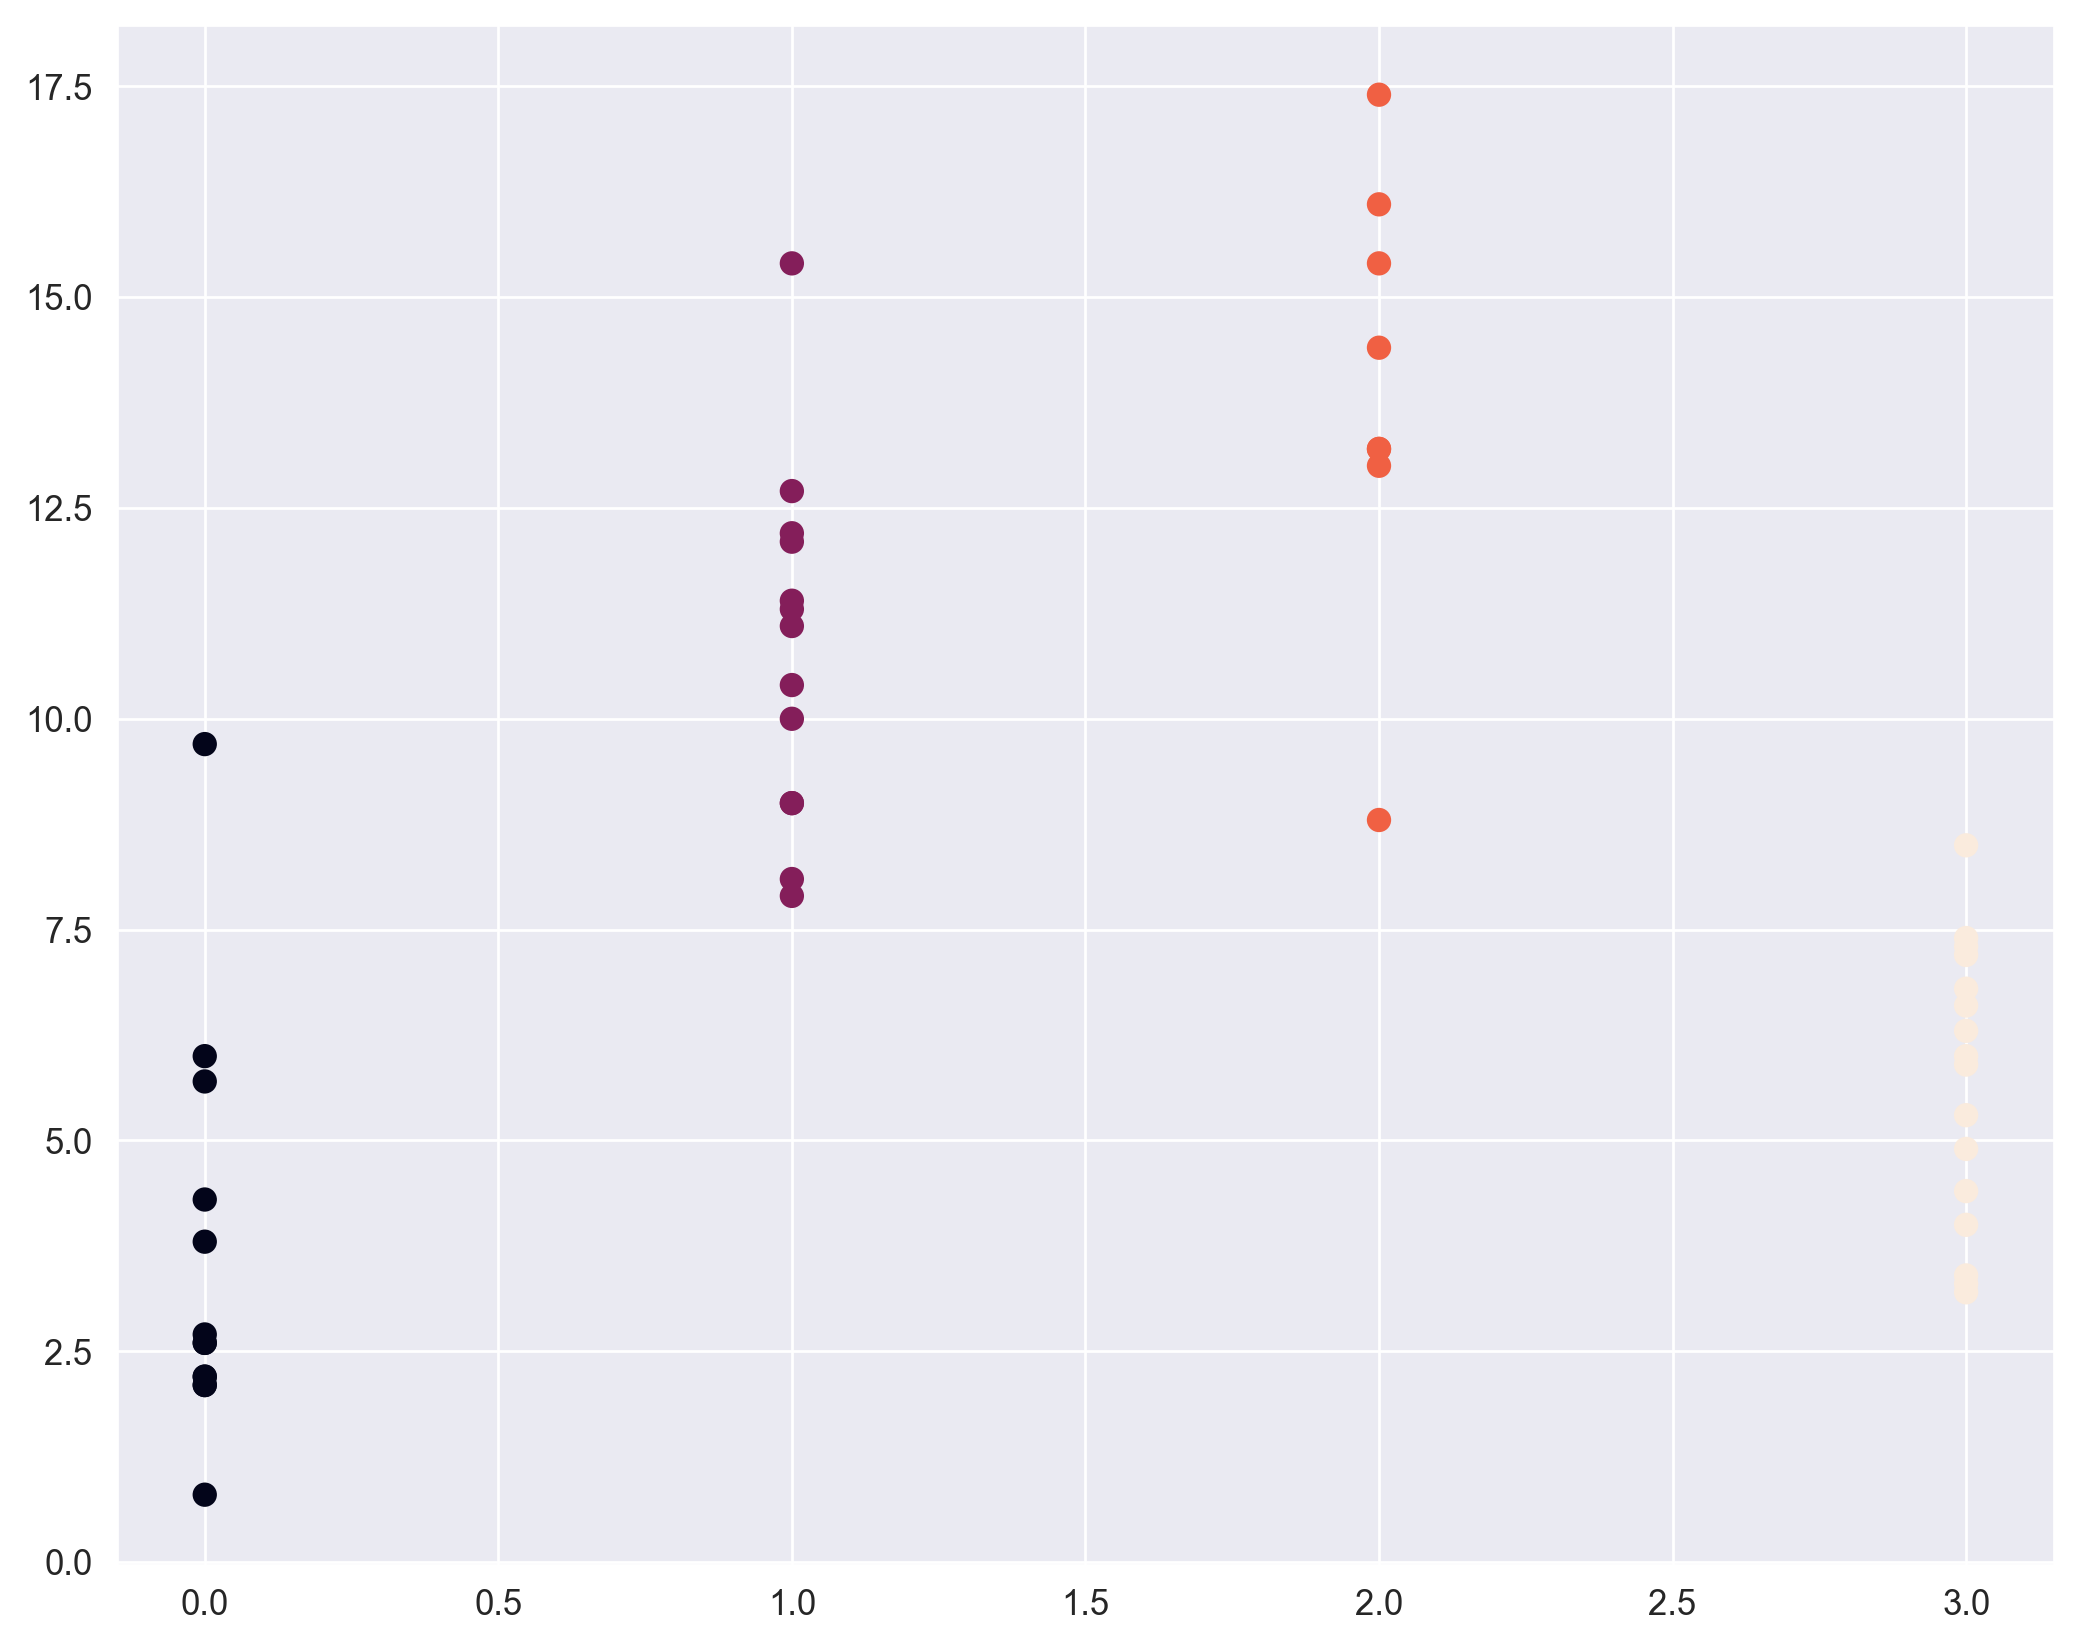

In [82]:
plt.figure(figsize=(10,8))
plt.scatter(df['Cluster'], df['Murder'], c=km.labels_)

# Evaluation K-means

In [83]:
from sklearn.metrics import silhouette_score

In [84]:
silhouette_score(x,y)

0.33968891433344395

In [85]:
from yellowbrick.cluster import SilhouetteVisualizer

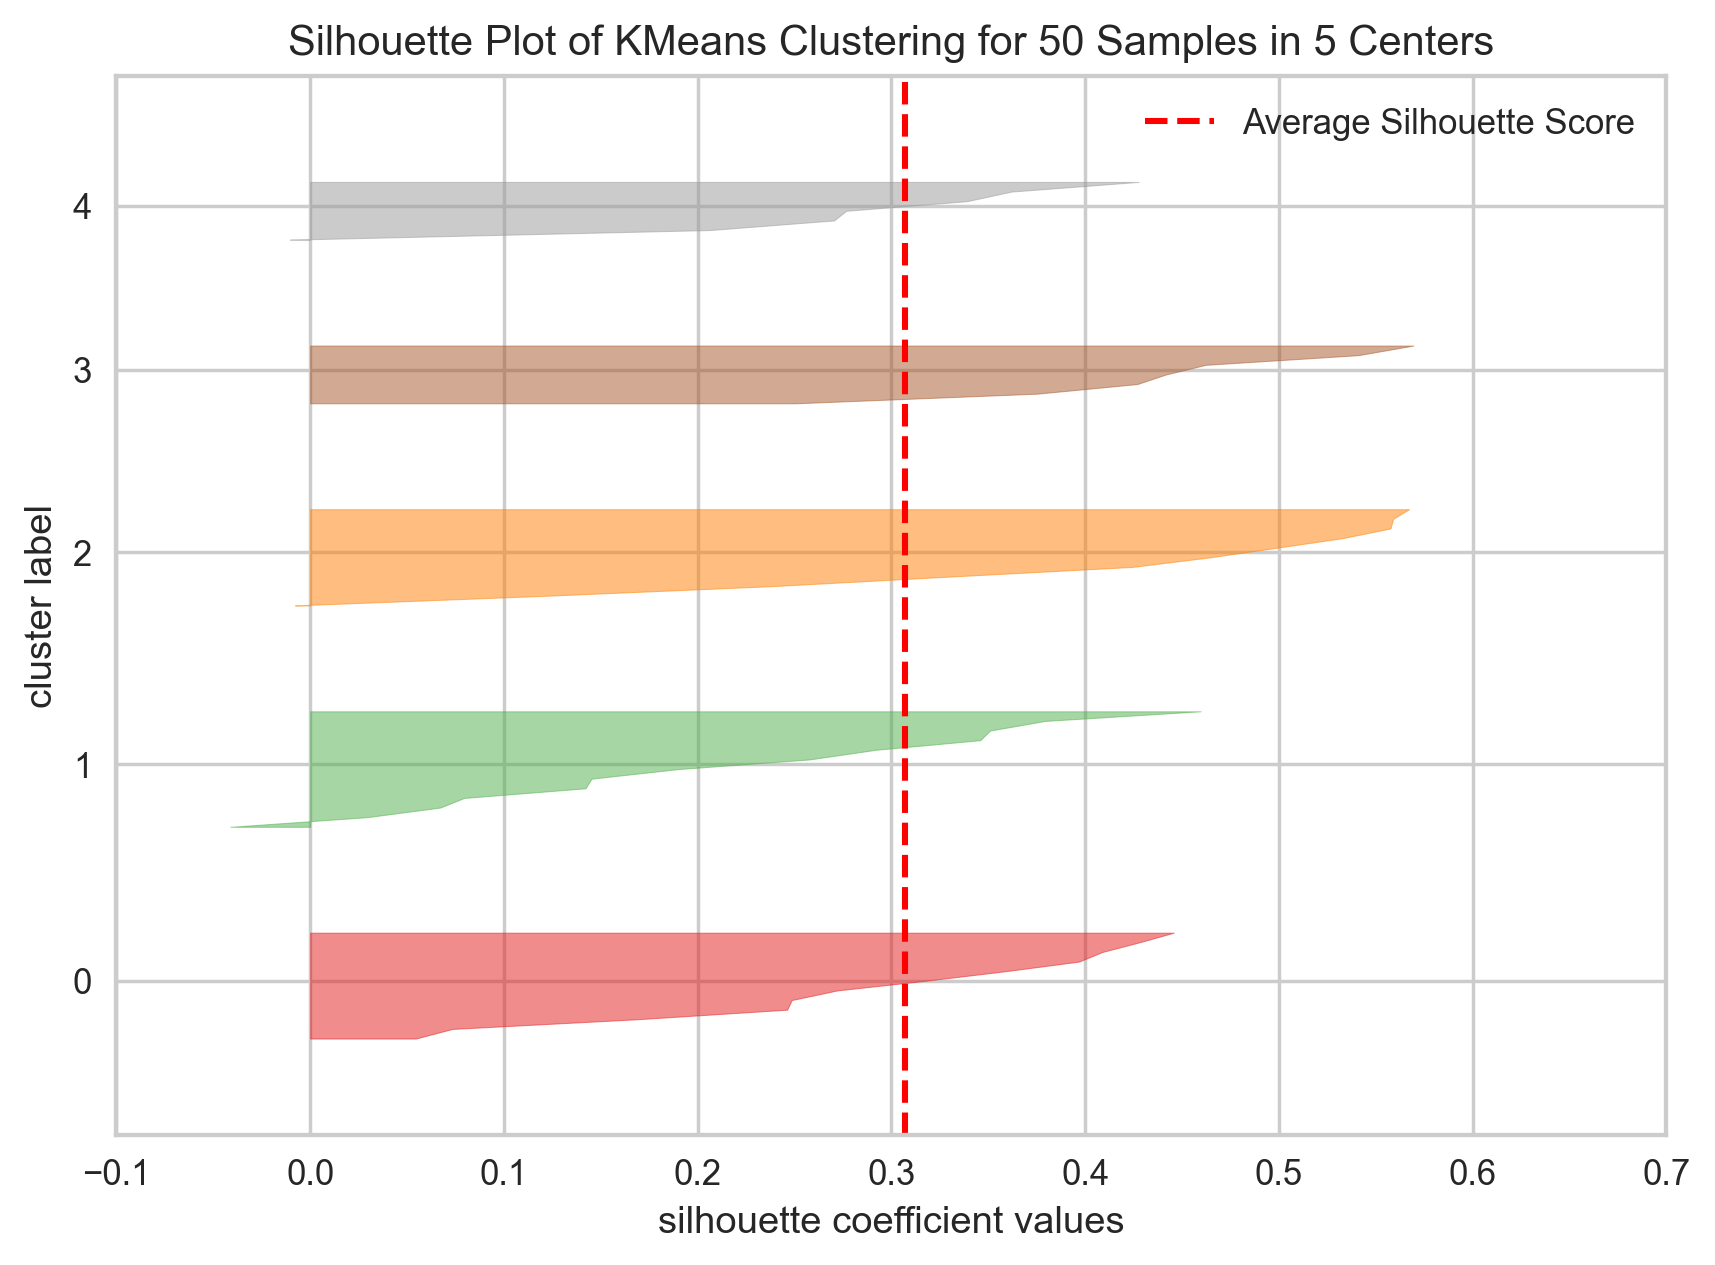

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [86]:
model = KMeans(n_clusters=5)
vis = SilhouetteVisualizer(model)

vis.fit(x)
vis.show()

# DBScan

In [87]:
from sklearn.cluster import DBSCAN

# Model Building

In [90]:
x 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [153]:
db = DBSCAN(eps=1, min_samples=4)
y = db.fit_predict(x)
y

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [154]:
silhouette_score(x,y)

0.2051154919322

In [157]:
df['Cluster']=y
df

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [156]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


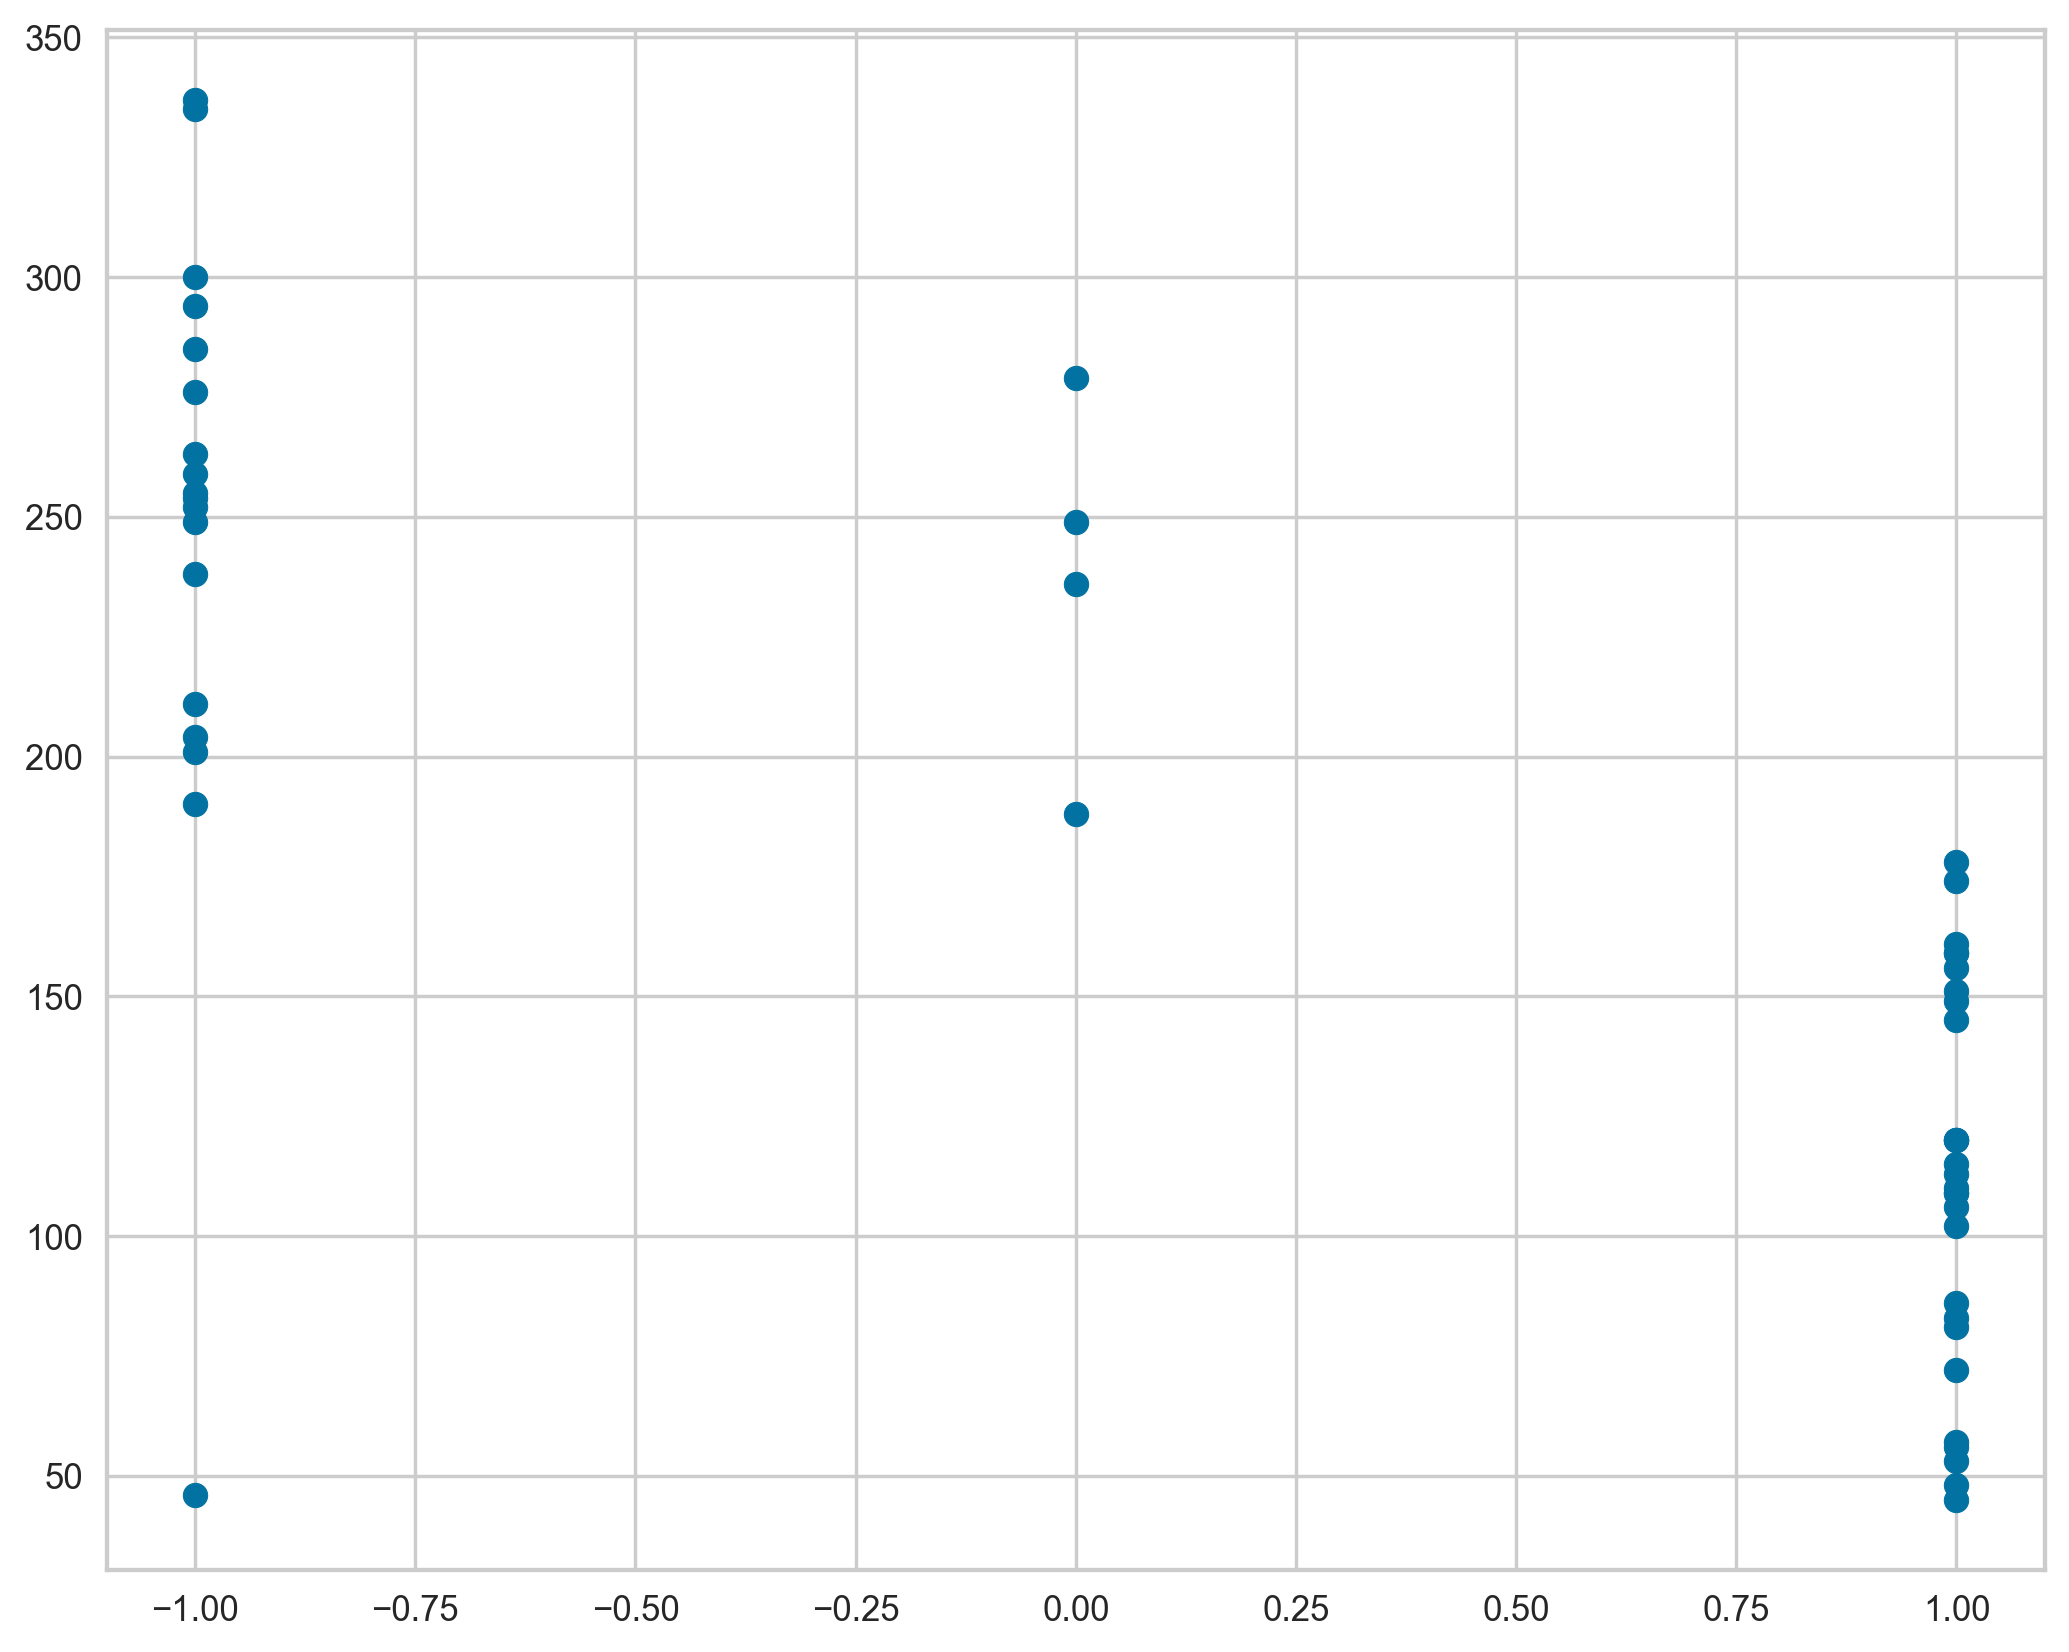

In [159]:
plt.figure(figsize=(10,8))
plt.scatter(df['Cluster'], df['Assault'])